Teaching a machine to classify between venomous and non- venomous snakes using pictures of 5 types of snakes : 2 venomous and 3 nonvenomous.

The Data has 5 classes , each contains photos of one snake type . Class 1,3,4: non-venomous, class 2,5: venomous 

Dataset : https://www.kaggle.com/sameeharahman/preprocessed-snake-images

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import random


pathALL ="/content/drive/MyDrive/Data1/PrePreccesedSnake/"
path1 = '/content/drive/MyDrive/Data1/PrePreccesedSnake/class-1 Nerodia sipedon - Northern Watersnake - NO/'
path2 = '/content/drive/MyDrive/Data1/PrePreccesedSnake/class-2 Thamnophis sirtalis- YES/'
path3 = '/content/drive/MyDrive/Data1/PrePreccesedSnake/class-3 Storeria dekayi - DeKays Brown snake - NO/'
path4 = "/content/drive/MyDrive/Data1/PrePreccesedSnake/class-4 - Patherophis obsoletus - Black Rat snake - NO/"
path5 = "/content/drive/MyDrive/Data1/PrePreccesedSnake/class 5 Crotalus atrox -YES/"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing the data

Here we will be trasforming our 5 directories into a merged labeled CSV file

In [ ]:
Image1_path = '001c80c16f964bb570d7eadcc09d0557.jpg'
im1 = Image.open(path1+Image1_path)
im1=im1.resize((100,100))
cropped_im1 = im1.crop((5,20,95,80))
img = plt.imshow(cropped_im1)
##opening the picture from the 1st directory, resizing it and cropping


In [ ]:
imageMat1 = np.asarray(cropped_im1) ## transformation into NumPy 
imageMat1.shape


(60, 90, 3)

In [ ]:
imageMat1_reshape = imageMat1.reshape(1, -1) ## make the 3D list of pixels to be converted into 1D list of pixels
imageMat1_reshape.shape


(1, 16200)

In [ ]:

#open all photos from the directory, flattting into numpy and stacking it with the rest of the numpy arrays and a 2D array.
loaded_images1 = imageMat1_reshape 

for filename in listdir(path1):

    resize_data = Image.open(path1 + filename).resize((100,100)) ##opening a picture and resizing it
    cropped_data = resize_data.crop((5,20,95,80)) ##cropping
    img_data = np.asarray(cropped_data).reshape(1,-1) ##flatten into NumPy

    loaded_images1 = np.vstack([loaded_images1,img_data]) ## stack the arrays up into a 2D NumPy array


In [ ]:
df1 = pd.DataFrame(loaded_images1)##creating a dataframe from the NumPy array

here we repeat our code 4 other times, once for each directory

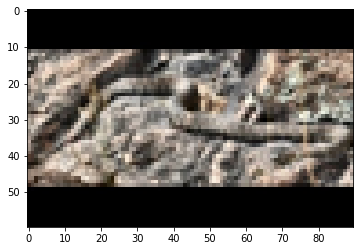

In [ ]:
Image2_path = '001ae171e179190d7d23672a04560259.jpg'
im2 = Image.open(path2+Image2_path)
im2=im2.resize((100,100))
cropped_im2 = im1.crop((5,20,95,80))
img = plt.imshow(cropped_im2)
##opening the picture from the 2nd directory, resizing it and cropping


In [ ]:
imageMat2 = np.asarray(cropped_im2) ## transformation into NumPy
imageMat2.shape


(60, 90, 3)

In [ ]:
imageMat2_reshape = imageMat2.reshape(1, -1)  ##make the 3D list of pixels to be converted into 1D list of pixels
imageMat2_reshape.shape

(1, 16200)

In [ ]:

loaded_images2 = imageMat2_reshape 

for filename in listdir(path2):
    resize_data = Image.open(path2 + filename).resize((100,100)) ##opening a picture and resizing it
    cropped_data = resize_data.crop((5,20,95,80)) ##cropping
    img_data = np.asarray(cropped_data).reshape(1,-1)##flatten inyo NumPy
    loaded_images2 = np.vstack([loaded_images2,img_data])  ## stack the 1D Numpyarrays up into a 2D NumPy array


In [ ]:
df2 = pd.DataFrame(loaded_images2)##creating a dataframe from the NumPy array

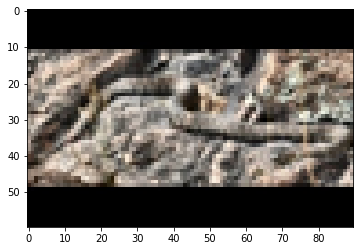

In [ ]:
Image3_path = '00c822eee45ef88597ab9d1806b8e52b.jpg'
im3 = Image.open(path3+Image3_path)
im3=im3.resize((100,100))
cropped_im3 = im3.crop((5,20,95,80))
img = plt.imshow(cropped_im2)
#opening a picture from the 3rd directory, resizing it and cropping


In [ ]:
imageMat3 = np.asarray(cropped_im3) ## transformation into NumPy
imageMat3.shape



(60, 90, 3)

In [ ]:
imageMat3_reshape = imageMat3.reshape(1, -1) ##make the 3D list of pixels to be converted into 1D list of pixels
imageMat3_reshape.shape

(1, 16200)

In [ ]:
loaded_images3 = imageMat3_reshape 
for filename in listdir(path3):
    resize_data = Image.open(path3 + filename).resize((100,100)) ##opening a picture and resizing it
    cropped_data = resize_data.crop((5,20,95,80)) ##cropping
    img_data = np.asarray(cropped_data).reshape(1,-1) ##flatten into NumPy
    loaded_images3 = np.vstack([loaded_images3,img_data]) ##stack the arrays up into a 2D NumPy array
  

In [ ]:
df3 = pd.DataFrame(loaded_images3)##creating a dataframe from the NumPy array

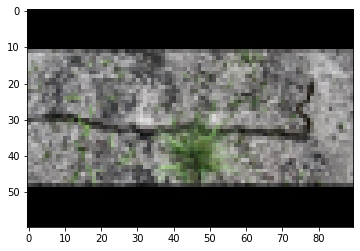

In [ ]:
Image4_path = '00c08642b76a8cfe979e971ddf1ab176.jpg'
im4 = Image.open(path4+Image4_path)
im4=im4.resize((100,100))
cropped_im4 = im4.crop((5,20,95,80))
img = plt.imshow(cropped_im4)
##opening the picture from the 4th directory,resizing it and cropping


In [ ]:
imageMat4 = np.asarray(cropped_im4) ## transformation into NumPy
imageMat4.shape

(60, 90, 3)

In [ ]:
imageMat4_reshape = imageMat4.reshape(1, -1) ##make the 3D list of pixels to be converted into 1D list of pixels
imageMat4_reshape.shape

(1, 16200)

In [ ]:
loaded_images4 = imageMat4_reshape 
for filename in listdir(path4):
    resize_data = Image.open(path4 + filename).resize((100,100)) ##opening a picture and resizing it
    cropped_data = resize_data.crop((5,20,95,80)) ##cropping
    img_data = np.asarray(cropped_data).reshape(1,-1) 
    loaded_images4 = np.vstack([loaded_images4,img_data])  ## stack the arrays up into a 2D NumPy array

In [ ]:
pd.DataFrame(loaded_images4).to_csv(path4+"Class4-NO.csv", index = None)##creating a dataframe from the NumPy array

In [ ]:
df4 = pd.DataFrame(loaded_images4)

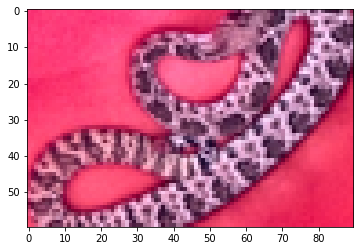

In [ ]:
Image5_path = '0140e693c1b0de8321ad99bccb551d74.jpg'
im5 = Image.open(path5+Image5_path)
im5=im5.resize((100,100))
cropped_im5 = im5.crop((5,20,95,80))
img = plt.imshow(cropped_im5)
##opening the picture from the 5th directory,resizing it and cropping



In [ ]:
imageMat5 = np.asarray(cropped_im5) ## transformation into NumPy
imageMat5.shape

(60, 90, 3)

In [ ]:
imageMat5_reshape = imageMat5.reshape(1, -1) ##make the 3D list of pixels to be converted into 1D list of pixels
imageMat5_reshape.shape

(1, 16200)

In [ ]:
loaded_images5 = imageMat5_reshape 
for filename in listdir(path5)
    resize_data = Image.open(path5 + filename).resize((100,100)) ##opening a picture and resizing it
    cropped_data = resize_data.crop((5,20,95,80)) ##cropping
    img_data = np.asarray(cropped_data).reshape(1,-1) ##flatten into NumPy
    loaded_images5 = np.vstack([loaded_images5,img_data]) ##stack the arrays up into a 2D NumPy array

In [ ]:

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df5 = pd.DataFrame(loaded_images5) ##creating a dataframe from the NumPy array

Labeling our dataframes; "label" = 0 for non-venomous; "label" = 1 for venomous;

In [ ]:
isVenomousLabel =1
isNotVenomousLabel= 0

In [ ]:
df1['label']=isNotVenomousLabel
df2['label']= isVenomousLabel 
df3['label']= isNotVenomousLabel
df4['label']= isNotVenomousLabel
df5['label']= isVenomousLabel 

Using .append() to merge our dataframes

In [ ]:
dfALL =df1.append(df2, ignore_index = True)
dfALL = dfALL.append(df3, ignore_index=True)
dfALL=dfALL.append(df4, ignore_index = True)
dfALL = dfALL.append(df5, ignore_index = True)
dfALL.shape



(17393, 16201)

Save our merged dataframe as a CSV file in the drive

In [ ]:
pd.DataFrame(dfALL).to_csv(pathALL+"dfALL.csv", index = None)##save the merged dataframe as CSV file in our drive

**Opening** **our** **merged** **CSV** **file** **as** **a** **dataframe**

In [ ]:
dfALL = pd.read_csv(pathALL+"dfALL.csv")

# Creating X,y fields
Creating X,y fields in order to split the data later into training and testing sets

In [ ]:
y = dfALL['label']

X = dfALL.drop(columns = 'label')

Normalizing- here we normallize only the X, because we want to Normallize the RGB values of the picture


In [ ]:
Normilized_X = X/255

Our Dataset in ready for prediction !!

Spilling our X,y into test,train in order to hand the model study the train sets and predict the test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 Normilized_X, y,train_size=0.5*0.8,test_size= 0.5*0.2, random_state=0)

# Knn
creating a knn classifier, training it with X_train,y_train and predicting


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4) ##Creating a Knn classifier
knn.fit(X_train,y_train) ##training the model using the train sets


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
sum(cross_val_score(knn,X_test,y_test,cv=4))/4 ##predicting our Knn classifier's success on the test sets


0.5764367816091954

After tesing the model succes with n_neighbors = 3,4,5,7,9,11,13 and with cross_validation = 3,4,5 I found out that n_neighbors =4, cross_validation=4 produces the best success rates

**Knn(n_neighbors =4, cv = 4) = 57.6%**

# SVM
Prediting with SVM's 3 models

Linear

In [ ]:
Linear_model = svm.SVC(kernel='linear') ##Creating a linear SVM model

Linear_model.fit(X_train, y_train) ##Train the model using the training sets

Linear_model.score(X_test, y_test) ##tesing the model's success using the test sets

0.5465517241379311

Poly

In [ ]:
Poly_model = svm.SVC(kernel='poly') ##Creating a poly SVM model

Poly_model.fit(X_train, y_train) ##Train the model using the training sets

Poly_model.score(X_test, y_test) ##tesing the model's success using the test sets

0.5902298850574713

Rbf

In [ ]:
Rbf_model = svm.SVC(kernel='rbf') ##Creating a rbg SVM model
Rbf_model.fit(X_train, y_train) ##Train the model using the training sets


Rbf_model.score(X_test, y_test)

NameError: ignored

**Accuracies**

linear = 54.6%

poly = 59%

rbf = 60.5%


**Confusion** **Matrix**

Knn model confusion matrix


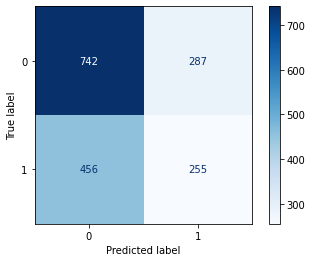

In [ ]:
print("Knn model confusion matrix")
plot_confusion_matrix(knn, X_test, y_test,values_format="d",cmap='Blues');

rbf model confusion matrix


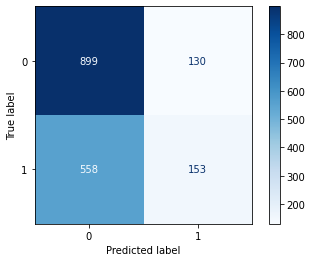

In [ ]:
print("rbf model confusion matrix")
plot_confusion_matrix(Rbf_model, X_test, y_test,values_format="d",cmap='Blues');


poly model confusion matrix


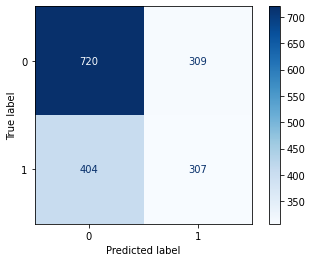

In [ ]:
print("poly model confusion matrix")
plEwww see eewwwewswqot_confusion_matrix(Poly_model, X_test, y_test,values_format="d",cmap='Blues');

# Visualization
Sample display of 5 random images from the dataset

In [ ]:
dfALL.shape

(17393, 16201)

In [ ]:
Min_index = 0 ##first index of the dataset
Max_index = dfALL.shape[0]-1 ##last index of the dataset, number of rows-1 due to arrays first index being 0.
print(Max_index)

17392


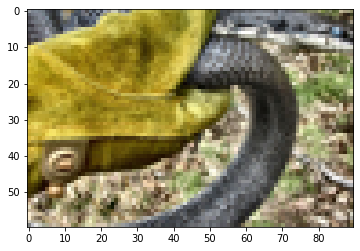

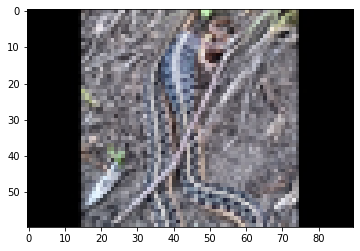

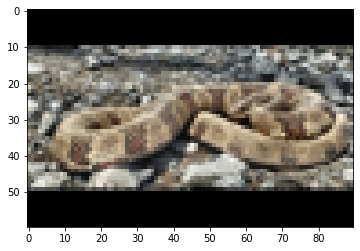

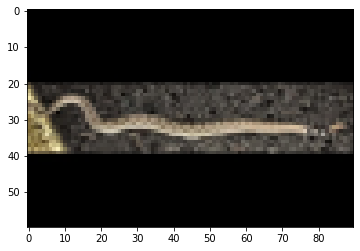

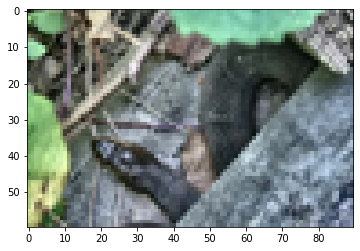

In [ ]:
i=0
for i in range(5):
  random_index = random.randint(Min_index,Max_index) 
  data =dfALL.loc[random_index] ##choosing a random picture index from the dataset
 
  pixel_values = data.drop('label') ##label aren't part of the picture, they help classifing them
  pixel_values = np.asarray(pixel_values)##trasforming dataframes into NumPy
  pixels_reshape=np.reshape(pixel_values,(60,90,3))##trasformation form NumPy to an Image
  img = plt.imshow(pixels_reshape) ##showing the Image
  plt.show()
 
